In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Necessary Importations

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import missingno as msno

import spacy
from spacy.tokens import Doc, Span
from spacy import displacy

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

import tensorflow as tf

# Loading Dataset : NER darija.csv

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/datasets/NER darija.csv", sep=",")

# Dataset Description:

The dataset is a Named Entity Recognition (NER) dataset in Darija, a variant of Arabic language. It consists of 65,903 tokens, which are individual units of text such as words or characters. The dataset includes 9 categories for labeling the named entities found in the text. The categories and their descriptions are as follows:

**B-LOC** (*Beginning of a location entity*): Marks the beginning of a location entity.

**I-LOC** (*Inside a location entity*): Indicates that the token is inside a location entity.

**O** (*Token outside any named entity*): Indicates that the token is not part of any named entity.

**B-ORG** (*Beginning of an organization entity*): Denotes the beginning of an organization entity.

**I-ORG** (*Inside an organization entity*): Indicates that the token is inside an organization entity.

**B-MISC** (Beginning of a miscellaneous entity): Represents the beginning of a miscellaneous entity.

**I-MISC** (Inside a miscellaneous entity): Specifies that the token is inside a miscellaneous entity.

**B-PER** (Beginning of a person entity): Marks the beginning of a person entity.

**I-PER** (Inside a person entity): Denotes that the token is inside a person entity.

# Visualizing Dataset

In [ ]:
df

,Sentence,Token,Tag
0,0,Uppsala,B-LOC
1,0,),O
2,0,هيّا,O
3,0,رابع,O
4,0,أكبر,O
...,...,...,...
65899,2510,فرقة,O
65900,2510,ديال,O
65901,2510,لكورة,O
65902,2510,ديال,O


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65904 entries, 0 to 65903
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  65904 non-null  int64 
 1   Token     65897 non-null  object
 2   Tag       65904 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.5+ MB


# Handeling missing Values

In [ ]:
df.isna().sum()

Sentence    0
Token       7
Tag         0
dtype: int64

In [ ]:
df = df.dropna()


In [ ]:
df.isna().sum()


Sentence    0
Token       0
Tag         0
dtype: int64

# Entities description

In [ ]:
#Extracting unique tags
pd.unique(df['Tag']).tolist()


['B-LOC', 'O', 'B-ORG', 'B-MISC', 'I-ORG', 'I-MISC', 'I-LOC', 'B-PER', 'I-PER']

- B-LOC: Beginning of a location entity
- O: Token outside any named entity
- B-ORG: Beginning of an organization entity
- B-MISC: Beginning of a miscellaneous entity
- I-ORG: Inside an organization entity
- I-MISC: Inside a miscellaneous entity
- I-LOC: Inside a location entity
- B-PER: Beginning of a person entity
- I-PER: Inside a person entity

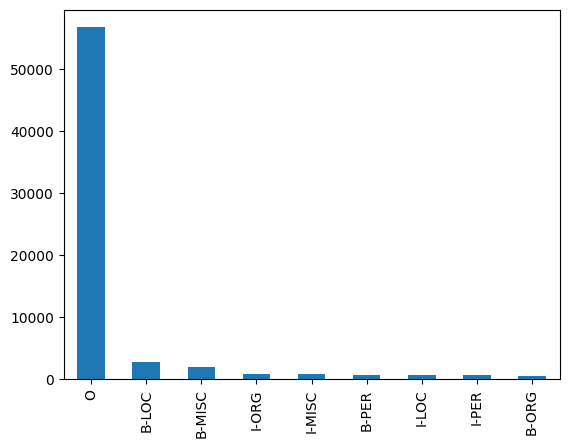

In [ ]:
df['Tag'].value_counts().plot(kind='bar')
plt.show()

# Visualizing Named Entities

In [ ]:
# Create a blank spaCy nlp pipeline
nlp = spacy.blank("ar")

# Create a Doc Doc object
doc = Doc(nlp.vocab, words=df['Token'].astype(str).tolist(), ents=df['Tag'])

In [ ]:
displacy.render(doc, style="ent",jupyter=True)


# Create Model

In [ ]:
df

,Sentence,Token,Tag
0,0,Uppsala,B-LOC
1,0,),O
2,0,هيّا,O
3,0,رابع,O
4,0,أكبر,O
...,...,...,...
65899,2510,فرقة,O
65900,2510,ديال,O
65901,2510,لكورة,O
65902,2510,ديال,O


In [ ]:
labels = np.array(['<PAD>', 'O', 'B-LOC', 'B-MISC', 'B-ORG', 'B-PER', 'I-LOC', 'I-MISC', 'I-ORG', 'I-PER'])
label_mapping = {label: index for index, label in enumerate(labels)}

df['Tag'] = df['Tag'].apply(lambda x: label_mapping[x])


<ipython-input-73-96e26f0433c1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Tag'] = df['Tag'].apply(lambda x: label_mapping[x])


In [ ]:
num_class = len(labels)
print(f'Nuber of Classes = {num_class}')

Nuber of Classes = 10


In [ ]:
df

,Sentence,Token,Tag
0,0,Uppsala,2
1,0,),1
2,0,هيّا,1
3,0,رابع,1
4,0,أكبر,1
...,...,...,...
65899,2510,فرقة,1
65900,2510,ديال,1
65901,2510,لكورة,1
65902,2510,ديال,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65897 entries, 0 to 65903
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  65897 non-null  int64 
 1   Token     65897 non-null  object
 2   Tag       65897 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 2.0+ MB


In [ ]:
max_length = df.groupby('Sentence').count()['Token'].max()
print(f'Max Lenght = {max_length}')


Max Lenght = 205


In [ ]:
num_sentence = len(pd.unique(df['Sentence']))
print(f'Number of Sentence = {num_sentence}')


Number of Sentence = 2511


In [ ]:
Tokens = df.groupby('Sentence')['Token'].agg(lambda x: x.tolist())

Tokenizer = tf.keras.preprocessing.text.Tokenizer()
Tokenizer.fit_on_texts(Tokens)

X = tf.keras.preprocessing.sequence.pad_sequences(Tokenizer.texts_to_sequences(Tokens), maxlen = max_length)


In [ ]:
vocab_size = len(Tokenizer.word_index) + 1
print(f'Vocabulary Size = {vocab_size}')


Vocabulary Size = 14164


In [ ]:
Tags = df.groupby('Sentence')['Tag'].agg(lambda x: x.tolist())

y = tf.keras.preprocessing.sequence.pad_sequences(Tags, maxlen = max_length)
y = np.array(tf.one_hot(y, depth=num_class))


In [ ]:
print(f'Input Shape: {X.shape}')
print(f'Output Shape: {y.shape}')

Input Shape: (2511, 205)
Output Shape: (2511, 205, 10)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [ ]:
print(f'train Input Shape: {X_train.shape}')
print(f'train Output Shape: {y_train.shape}')
print()
print(f'test Input Shape: {X_test.shape}')
print(f'test Output Shape: {y_test.shape}')

train Input Shape: (2008, 205)
train Output Shape: (2008, 205, 10)

test Input Shape: (503, 205)
test Output Shape: (503, 205, 10)


In [ ]:
#------------------------------------------------- LSTM ---------------------------------------------------------------

model_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=50, input_length=max_length),
    tf.keras.layers.Masking(mask_value=0.0),
    tf.keras.layers.LSTM(units=64, return_sequences=True, dropout=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_class, activation='softmax'),
])


#------------------------------------------------- RNN  ---------------------------------------------------------------
# Build RNN model
model_rnn = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=50, input_length=max_length),
    tf.keras.layers.Masking(mask_value=0.0),
    tf.keras.layers.SimpleRNN(units=64, return_sequences=True, dropout=0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_class, activation='softmax'),
])

In [ ]:
model_lstm.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 205, 50)           708200    
                                                                 
 masking_5 (Masking)         (None, 205, 50)           0         
                                                                 
 lstm_2 (LSTM)               (None, 205, 64)           29440     
                                                                 
 dense_8 (Dense)             (None, 205, 512)          33280     
                                                                 
 dropout_4 (Dropout)         (None, 205, 512)          0         
                                                                 
 dense_9 (Dense)             (None, 205, 10)           5130      
                                                                 
Total params: 776050 (2.96 MB)
Trainable params: 77605

In [ ]:
model_rnn.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 205, 50)           708200    
                                                                 
 masking_6 (Masking)         (None, 205, 50)           0         
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 205, 64)           7360      
                                                                 
 dense_10 (Dense)            (None, 205, 512)          33280     
                                                                 
 dropout_5 (Dropout)         (None, 205, 512)          0         
                                                                 
 dense_11 (Dense)            (None, 205, 10)           5130      
                                                                 
Total params: 753970 (2.88 MB)
Trainable params: 75397

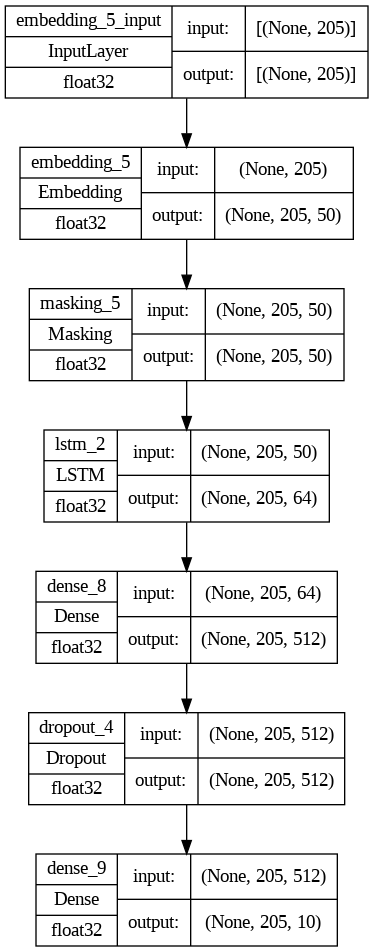

In [ ]:
#LSTM
tf.keras.utils.plot_model(model_lstm, show_shapes=True, show_dtype=True)

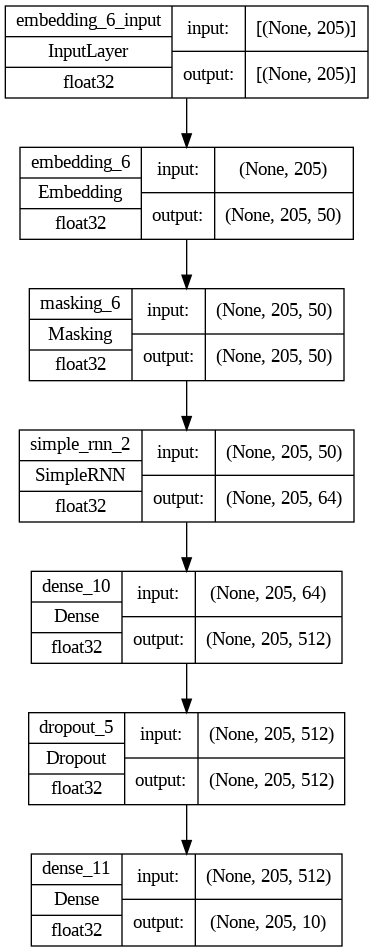

In [ ]:
#RNN
tf.keras.utils.plot_model(model_rnn, show_shapes=True, show_dtype=True)

In [ ]:
LR = 1e-4
BATCH_SIZE = 32
EPOCHS = 100

checkpoint_lstm = tf.keras.callbacks.ModelCheckpoint(
    'LSTM_NER_Model.h5',
    save_best_only=True,
    save_weights_only=True
)

checkpoint_rnn = tf.keras.callbacks.ModelCheckpoint(
    'RNN_NER_Model.h5',
    save_best_only=True,
    save_weights_only=True
)

early_stop = tf.keras.callbacks.EarlyStopping(
    min_delta=1e-4,
    patience=10
)

In [ ]:
model_lstm.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LR), loss='categorical_focal_crossentropy',
              metrics=['accuracy'])

model_rnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LR), loss='categorical_focal_crossentropy',
              metrics=['accuracy'])

In [ ]:
print("Training on GPU...") if tf.test.is_gpu_available() else print("Training on CPU...")

Training on GPU...


In [ ]:
history_lstm = model_lstm.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_split=0.2, callbacks=[early_stop, checkpoint_lstm])

Epoch 1/100
51/51 [==============================] - 14s 169ms/step - loss: 0.4347 - accuracy: 0.7816 - val_loss: 0.3718 - val_accuracy: 0.8779
Epoch 2/100
51/51 [==============================] - 9s 170ms/step - loss: 0.1897 - accuracy: 0.8724 - val_loss: 0.0791 - val_accuracy: 0.8779
Epoch 3/100
51/51 [==============================] - 4s 86ms/step - loss: 0.0674 - accuracy: 0.8727 - val_loss: 0.0497 - val_accuracy: 0.8779
Epoch 4/100
51/51 [==============================] - 4s 78ms/step - loss: 0.0481 - accuracy: 0.8885 - val_loss: 0.0388 - val_accuracy: 0.9138
Epoch 5/100
51/51 [==============================] - 6s 113ms/step - loss: 0.0382 - accuracy: 0.9346 - val_loss: 0.0311 - val_accuracy: 0.9589
Epoch 6/100
51/51 [==============================] - 3s 58ms/step - loss: 0.0308 - accuracy: 0.9613 - val_loss: 0.0259 - val_accuracy: 0.9674
Epoch 7/100
51/51 [==============================] - 2s 39ms/step - loss: 0.0260 - accuracy: 0.9679 - val_loss: 0.0223 - val_accuracy: 0.9710
Ep

In [ ]:
history_rnn = model_rnn.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_split=0.2, callbacks=[early_stop, checkpoint_rnn])

Epoch 1/100
51/51 [==============================] - 30s 527ms/step - loss: 0.2339 - accuracy: 0.8388 - val_loss: 0.0863 - val_accuracy: 0.8779
Epoch 2/100
51/51 [==============================] - 27s 530ms/step - loss: 0.0732 - accuracy: 0.8720 - val_loss: 0.0539 - val_accuracy: 0.8779
Epoch 3/100
51/51 [==============================] - 28s 541ms/step - loss: 0.0551 - accuracy: 0.8723 - val_loss: 0.0437 - val_accuracy: 0.8779
Epoch 4/100
51/51 [==============================] - 25s 495ms/step - loss: 0.0402 - accuracy: 0.9052 - val_loss: 0.0273 - val_accuracy: 0.9602
Epoch 5/100
51/51 [==============================] - 28s 557ms/step - loss: 0.0267 - accuracy: 0.9637 - val_loss: 0.0207 - val_accuracy: 0.9719
Epoch 6/100
51/51 [==============================] - 25s 485ms/step - loss: 0.0213 - accuracy: 0.9719 - val_loss: 0.0180 - val_accuracy: 0.9748
Epoch 7/100
51/51 [==============================] - 23s 444ms/step - loss: 0.0190 - accuracy: 0.9744 - val_loss: 0.0164 - val_accuracy:

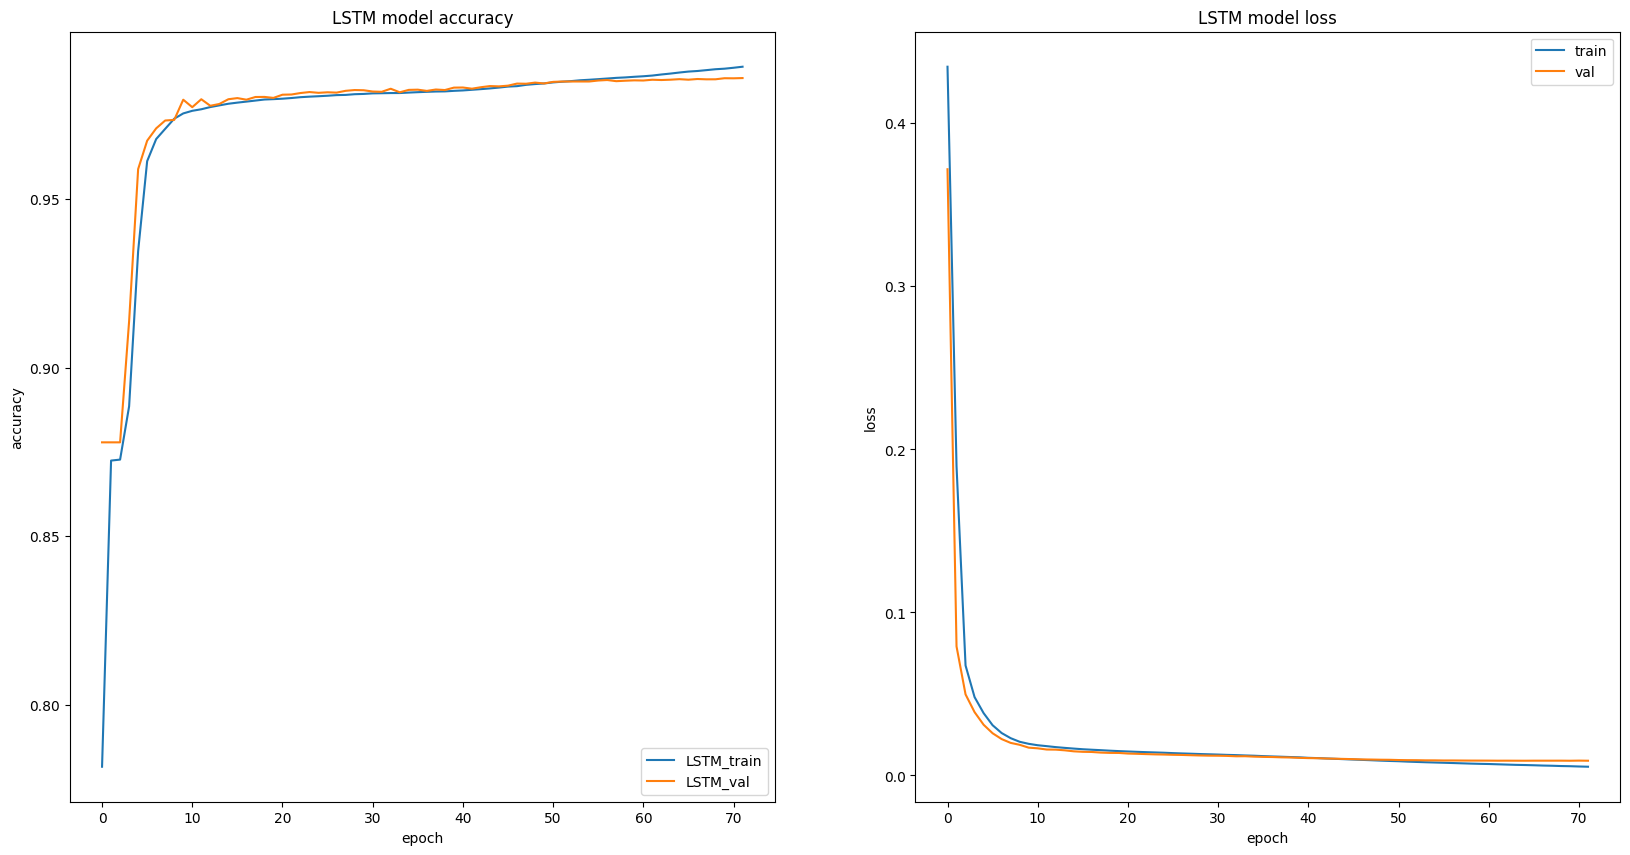

In [ ]:
s, (at, al) = plt.subplots(1,2)
s.set_figwidth(20)
s.set_figheight(10)
at.plot(history_lstm.history['accuracy'])
at.plot(history_lstm.history['val_accuracy'])
at.set_title('LSTM model accuracy')
at.set_ylabel('accuracy')
at.set_xlabel('epoch')
at.legend(['LSTM_train', 'LSTM_val'], loc='lower right')

al.plot(history_lstm.history['loss'])
al.plot(history_lstm.history['val_loss'])
al.set_title('LSTM model loss')
al.set_ylabel('loss')
al.set_xlabel('epoch')
al.legend(['train', 'val'], loc = 'upper right')

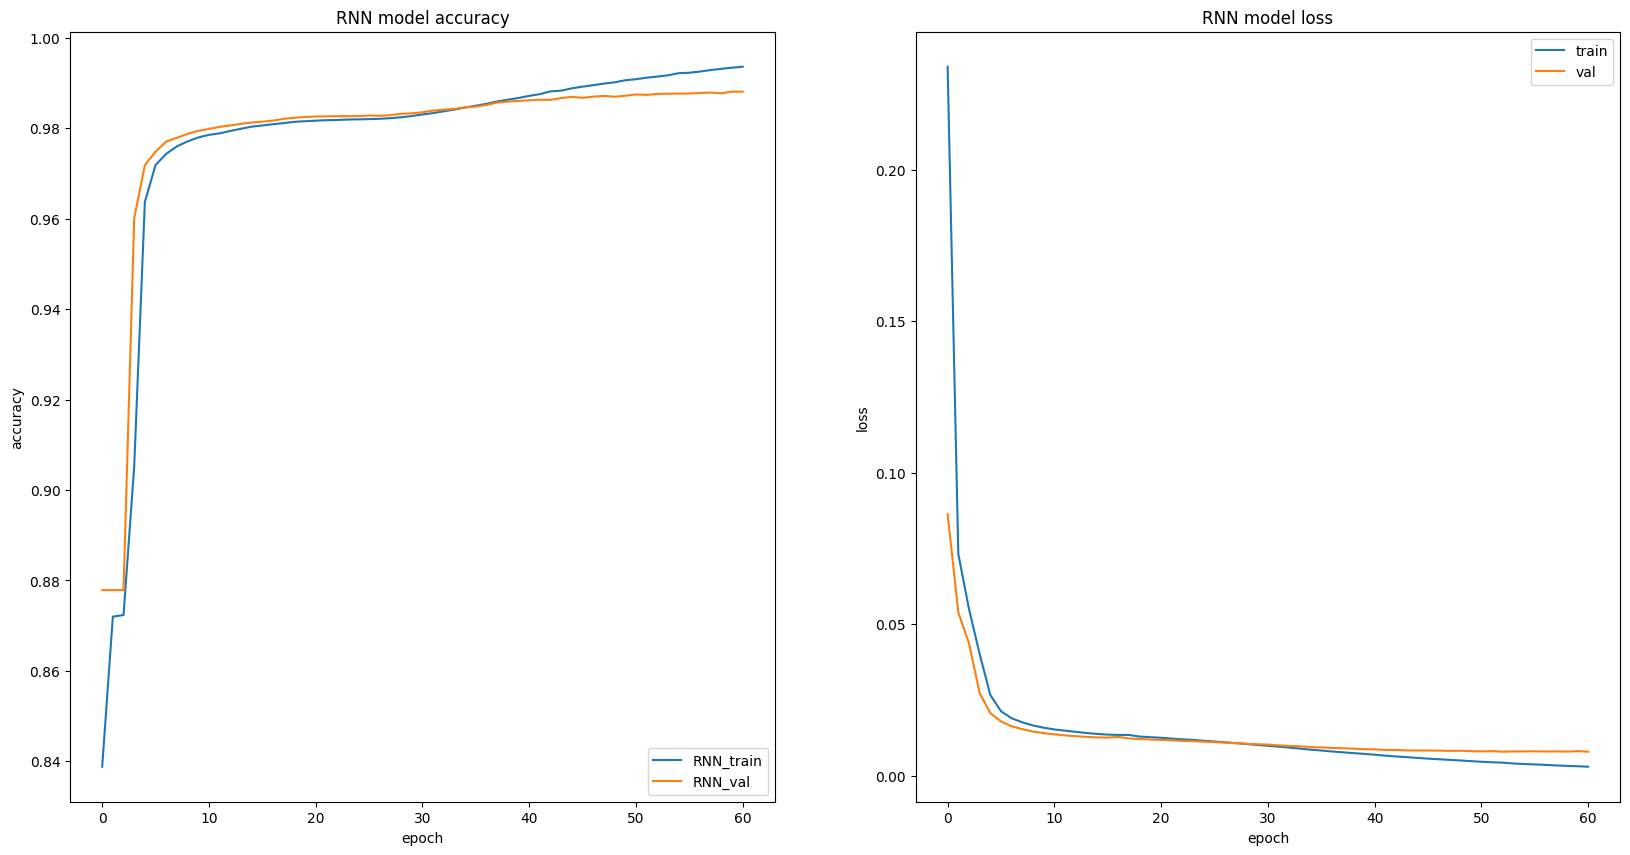

In [ ]:
s, (at, al) = plt.subplots(1,2)
s.set_figwidth(20)
s.set_figheight(10)
at.plot(history_rnn.history['accuracy'])
at.plot(history_rnn.history['val_accuracy'])
at.set_title('RNN model accuracy')
at.set_ylabel('accuracy')
at.set_xlabel('epoch')
at.legend(['RNN_train', 'RNN_val'], loc='lower right')

al.plot(history_rnn.history['loss'])
al.plot(history_rnn.history['val_loss'])
al.set_title('RNN model loss')
al.set_ylabel('loss')
al.set_xlabel('epoch')
al.legend(['train', 'val'], loc = 'upper right')

In [ ]:
model_lstm.evaluate(X_test, y_test)

16/16 [==============================] - 0s 13ms/step - loss: 0.0095 - accuracy: 0.9855


[0.009520543739199638, 0.9854531288146973]

In [ ]:
model_rnn.evaluate(X_test, y_test)

16/16 [==============================] - 1s 44ms/step - loss: 0.0091 - accuracy: 0.9867


[0.009065242484211922, 0.9867332577705383]

In [ ]:
y_test = np.argmax(y_test, axis=-1)

In [ ]:
y_pred_lstm = np.argmax(model_lstm.predict(X_test), axis=-1)

16/16 [==============================] - 1s 9ms/step


In [ ]:
y_pred_rnn = np.argmax(model_rnn.predict(X_test), axis=-1)

16/16 [==============================] - 1s 25ms/step


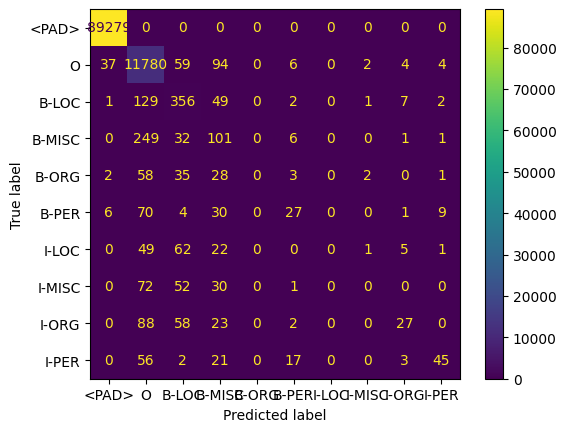

In [ ]:
#LSTM
CM = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test.flatten(), y_pred_lstm.flatten()), display_labels=labels)
CM.plot()
plt.show()

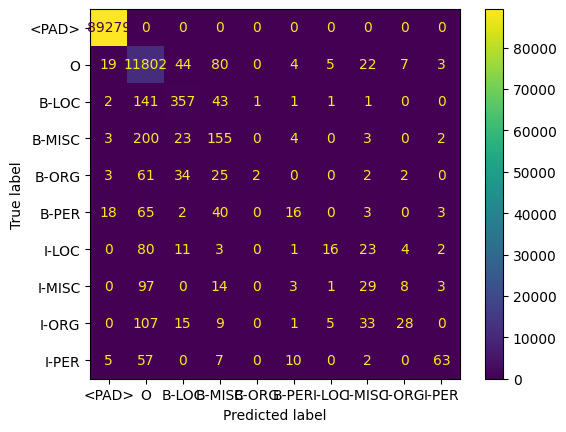

In [ ]:
#RNN
CM2 = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test.flatten(), y_pred_rnn.flatten()), display_labels=labels)
CM2.plot()
plt.show()

In [ ]:
#LSTM
print(classification_report(y_test.flatten(), y_pred_lstm.flatten()))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     89279
           1       0.94      0.98      0.96     11986
           2       0.54      0.65      0.59       547
           3       0.25      0.26      0.26       390
           4       0.00      0.00      0.00       129
           5       0.42      0.18      0.26       147
           6       0.00      0.00      0.00       140
           7       0.00      0.00      0.00       155
           8       0.56      0.14      0.22       198
           9       0.71      0.31      0.43       144

    accuracy                           0.99    103115
   macro avg       0.44      0.35      0.37    103115
weighted avg       0.98      0.99      0.98    103115



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#RNN
print(classification_report(y_test.flatten(), y_pred_rnn.flatten()))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     89279
           1       0.94      0.98      0.96     11986
           2       0.73      0.65      0.69       547
           3       0.41      0.40      0.40       390
           4       0.67      0.02      0.03       129
           5       0.40      0.11      0.17       147
           6       0.57      0.11      0.19       140
           7       0.25      0.19      0.21       155
           8       0.57      0.14      0.23       198
           9       0.83      0.44      0.57       144

    accuracy                           0.99    103115
   macro avg       0.64      0.40      0.45    103115
weighted avg       0.98      0.99      0.98    103115

